<a href="https://colab.research.google.com/github/BrianDL/fisica_computacional/blob/main/2%20-%20Perihelio%20de%20Mercurio/simulacion_mercurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de la Órbita de Mercurio

Este notebook contiene la implementación del método de Runge-Kutta de segundo orden (RK2) para simular la órbita de Mercurio y calcular la precesión de su perihelio.


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def simular_orbita_mercurio(
        x_inicial:float = None,  ### hacemos esta configuración más abajo
        y_inicial:float = 0,
        vx_inicial:float = 0,
        vy_inicial:float = None, ### hacemos esta configuración más abajo
        iteraciones:int = 20000,
        delta_t: float = 0.0001,
        alpha: float = 0.0008
    ):

    ### Configurando los valores iniciales por defecto
    # Constantes
    #G = 6.67430e-11  # Constante gravitacional (m^3 kg^-1 s^-2)
    #M_s = 1.989e30   # Masa del Sol (kg)

    GM_s = 4 * np.pi**2
    a = 0.39
    e = 0.206

    # Inicializar variables
    x :float = x_inicial if x_inicial else (1+e)*a
    y :float = y_inicial
    vx:float = vx_inicial
    vy:float = vy_inicial if vy_inicial else np.sqrt( GM_s*(1-e)/( a*(1+e) ) )
    t :float = 0  # Tiempo inicial siempre igual cero

    # Listas para almacenar resultados
    tiempos = [t]
    posiciones = [(x, y)]
    velocidades = [(vx, vy)]

    # Bucle principal de la simulación
    for i in range(iteraciones):

        # Calcular variables radiales
        r = np.sqrt(x**2 + y**2)
        v = np.sqrt(vx**2 + vy**2)

        # Calcular los valores intermedios (k1)
        k1_x = delta_t * vx
        k1_y = delta_t * vy
        k1_vx = delta_t * (-GM_s * x / r**3) * (1 + alpha / r**2)
        k1_vy = delta_t * (-GM_s * y / r**3) * (1 + alpha / r**2)

        # Calcular los valores finales (k2)
        x_mid = x + k1_x/2.0
        y_mid = y + k1_y/2.0
        vx_mid = vx + k1_vx/2.0
        vy_mid = vy + k1_vy/2.0
        r_mid = np.sqrt(x_mid**2 + y_mid**2)

        k2_x = delta_t * vx_mid
        k2_y = delta_t * vy_mid
        k2_vx = delta_t * (-GM_s * x_mid / r_mid**3) * (1 + alpha / r_mid**2)
        k2_vy = delta_t * (-GM_s * y_mid / r_mid**3) * (1 + alpha / r_mid**2)

        # Actualizar los valores para el siguiente paso
        x += k2_x
        y += k2_y
        vx += k2_vx
        vy += k2_vy
        t += delta_t

        #if i % 100 == 0: ### debugging
        #  print(t, (vx,vy), (k1_x,k1_y), (k2_x,k2_y), (k1_vx, k1_vy), (k2_vx, k2_vy) )


        # Guardar los resultados en cada paso
        tiempos.append(t)
        posiciones.append((x, y))
        velocidades.append((vx, vy))

    return tiempos, posiciones, velocidades

Esta función `simular_orbita_mercurio` implementa el método RK2 para simular la órbita de Mercurio. En las siguientes celdas, añadiremos código para ejecutar la simulación, visualizar los resultados y calcular la precesión del perihelio.

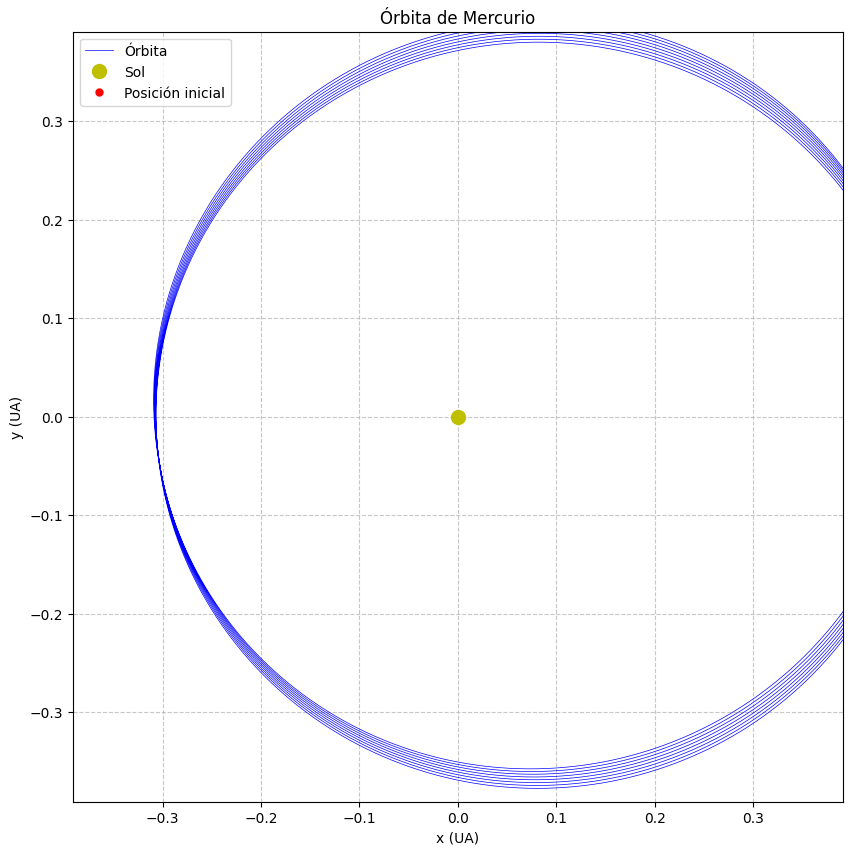

In [21]:
import matplotlib.pyplot as plt

def plot_orbita(posiciones, titulo="Órbita de Mercurio"):
    # Extraer las coordenadas x e y de las posiciones
    x = [pos[0] for pos in posiciones]
    y = [pos[1] for pos in posiciones]

    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plotear la órbita
    ax.plot(x, y, 'b-', linewidth=0.5, label='Órbita')

    # Plotear el Sol
    ax.plot(0, 0, 'yo', markersize=10, label='Sol')

    # Plotear la posición inicial de Mercurio
    ax.plot(x[0], y[0], 'ro', markersize=5, label='Posición inicial')

    # Configurar los límites de los ejes
    max_range = max(max(x) - min(x), max(y) - min(y))
    ax.set_xlim(-(max_range/2), max_range/2)
    ax.set_ylim(-(max_range/2), max_range/2)

    # Configurar etiquetas y título
    ax.set_xlabel('x (UA)')
    ax.set_ylabel('y (UA)')
    ax.set_title(titulo)

    # Añadir leyenda
    ax.legend()

    # Añadir una cuadrícula
    ax.grid(True, linestyle='--', alpha=0.7)

    # Hacer que los ejes sean iguales para mantener la forma circular
    ax.set_aspect('equal', 'box')

    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso:
# Primero, ejecutamos la simulación
tiempos, posiciones, velocidades = simular_orbita_mercurio(alpha= 0.0008)


#print("Tiempos", tiempos)
#print("posiciones", posiciones)
#print("velocidades", velocidades)

# Luego, ploteamos la órbita
plot_orbita(posiciones)

Para alpha = 0.001, la precesión es de 3912546.34 segundos de arco por siglo.
